## Ground Truth Test

In [1]:
import torch
import torchvision.transforms as transforms              
from torchvision.datasets import CIFAR10      
from torch.utils.data import DataLoader
from src.temperature_scaling import ModelWithTemperature
from src.cifar10h import aps_cifar10h_hist, raps_cifar10h_hist, saps_cifar10h_hist, aps_cifar10h_scatter, raps_cifar10h_scatter, saps_cifar10h_scatter
from src.inception import inception_v3

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

dict_path = "C:\\Users\\jiayang\\ipynb\\trainedModel\\Inception_CIFAR10.pth"
model = inception_v3(pretrained=True, dict_path=dict_path).to(device)

# preprocess the images from CIFAR10
data_transform = transforms.Compose([
    transforms.ToTensor(),       
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))  
])

# load images from CIFAR10
dataset = CIFAR10(root="../data", train=False, download=True, transform=data_transform)

# Temperature Scaling
temp_scal_loader = DataLoader(dataset, batch_size=32, shuffle=True)
model = ModelWithTemperature(model, temperature=5.2).to(device)
model.set_temperature(temp_scal_loader)
model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.05

Loading weights from: C:\Users\jiayang\ipynb\trainedModel\Inception_CIFAR10.pth
Files already downloaded and verified
Before temperature - NLL: 0.358, ECE: 0.030
Optimal temperature: 5.125
After temperature - NLL: 0.888, ECE: 0.412


APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9244 ± 0.0036
Final Average Prediction Set Size: 1.08 ± 0.01
Final Average Coverage: 0.9451 ± 0.0052
Final Average Real Probability: 0.9218 ± 0.0054


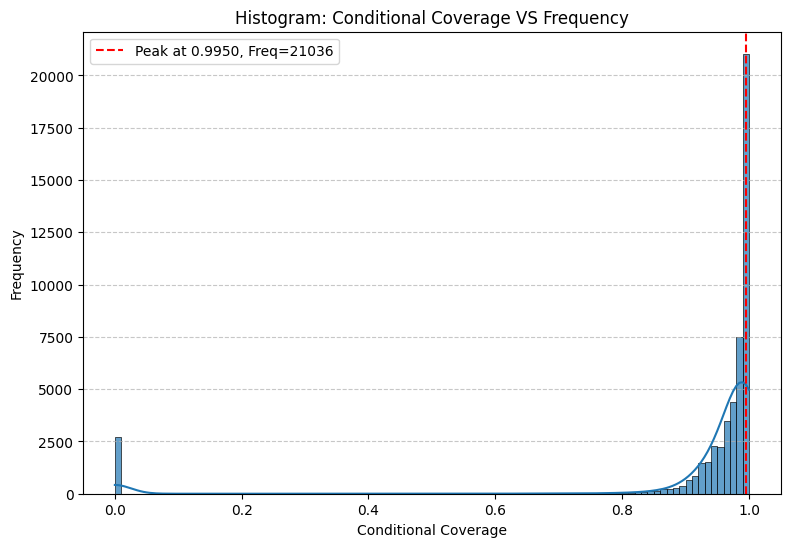

21036 (42.07%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9246 ± 0.0037
Final Average Prediction Set Size: 1.05 ± 0.01
Final Average Coverage: 0.9448 ± 0.0054
Final Average Real Probability: 0.9192 ± 0.0053


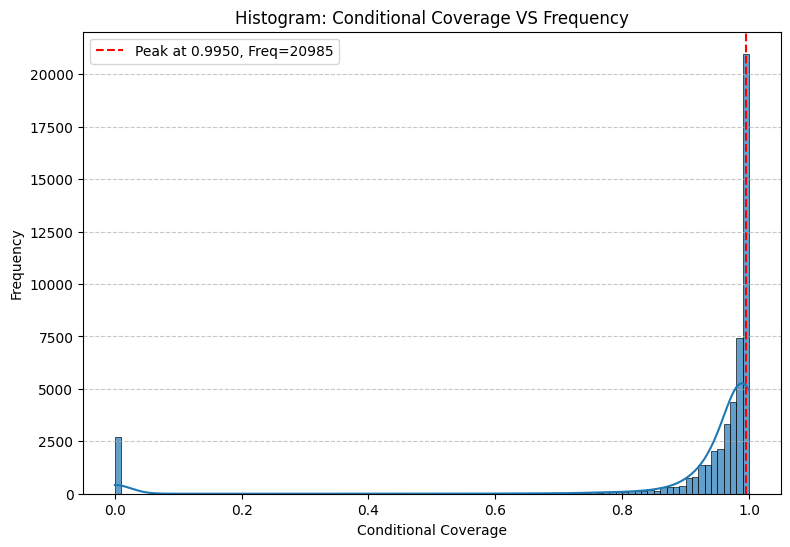

20985 (41.97%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.2, k_reg=2, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9322 ± 0.0027
Final Average Prediction Set Size: 0.98 ± 0.00
Final Average Coverage: 0.9504 ± 0.0028
Final Average Real Probability: 0.9160 ± 0.0026


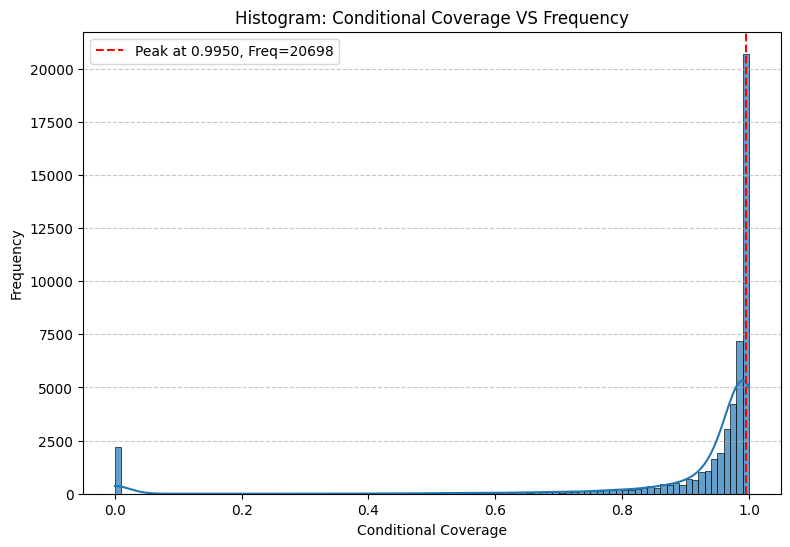

20698 (41.40%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_cifar10h_hist(model, dataset, device, lambda_=1.0, num_runs=10, alpha=0.05)

## Model Test

APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.6620 ± 0.0042
Final Average Prediction Set Size: 2.44 ± 0.04
Final Average Coverage: 0.9500 ± 0.0024
Final Average Real Probability: 0.9343 ± 0.0026


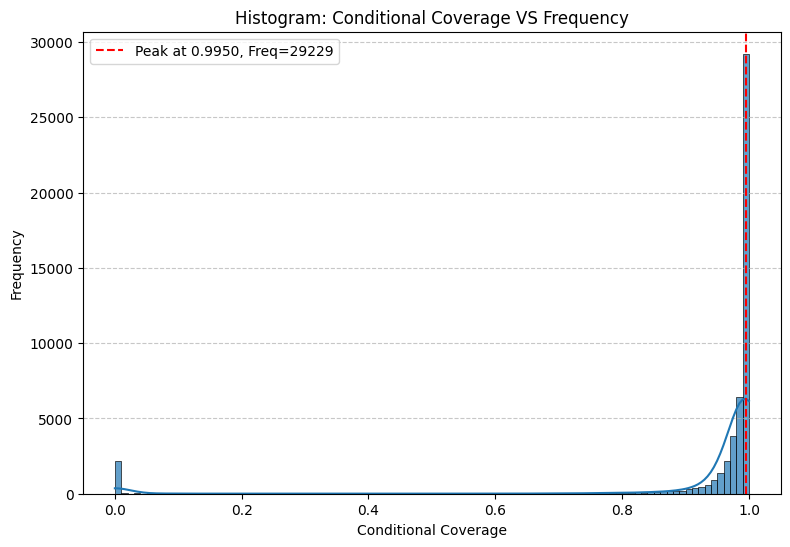

29229 (58.46%) samples reached the peak conditional coverage at 0.9950


In [5]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.6620 ± 0.0042
Final Average Prediction Set Size: 2.44 ± 0.04
Final Average Coverage: 0.9500 ± 0.0024
Final Average Real Probability: 0.9343 ± 0.0026


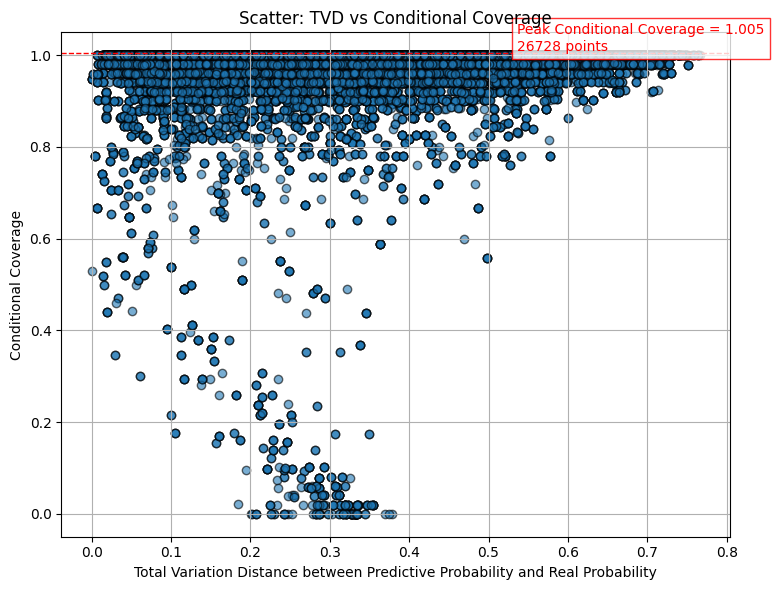

Peak Conditional Coverage = 1.005, with 26728 samples

=== Count Regions Summary ===
33593 (67.2%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
7494 (15.0%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
944 (1.9%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.80428']
  Real Probability Set      : ['1.00000']
Sample 2:
  Predictive Probability Set: ['0.95744']
  Real Probability Set      : ['1.00000']
Sample 3:
  Predictive Probability Set: ['0.78525']
  Real Probability Set      : ['0.86792']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.29861', '0.27542']
  Real Probability Set      : ['0.02041', '0.10204']
Sample 2:
  Predictive Probability Set: ['0.31168', '0.19827', '0.14634']
  Real Probability Set      : ['0.00000', '0.00000', '0.04000']
Sample 3:
  Predictive Probability Set: ['0.25707', '0.20932', '0.16811']

In [2]:
aps_cifar10h_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.7196 ± 0.0051
Final Average Prediction Set Size: 1.87 ± 0.01
Final Average Coverage: 0.9508 ± 0.0019
Final Average Real Probability: 0.9305 ± 0.0018


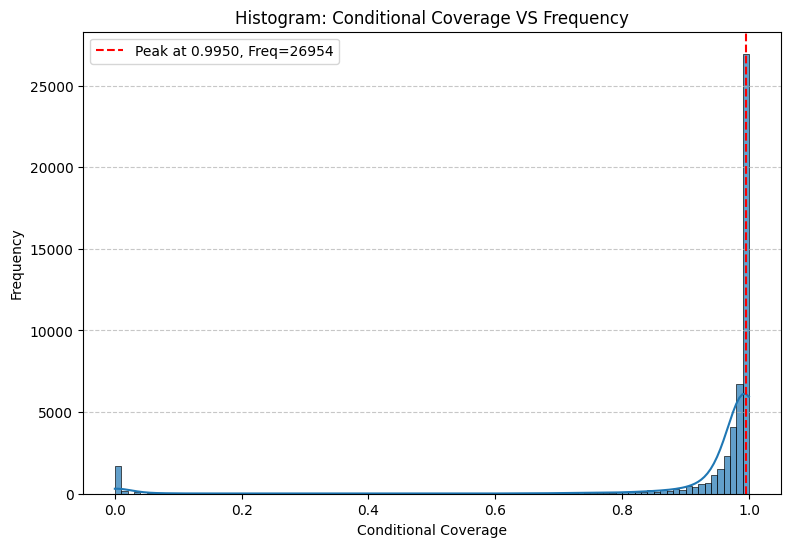

26954 (53.91%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.2, k_reg=2, num_runs=10, alpha=0.05, is_ground_truth=False)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.7028 ± 0.0053
Final Average Prediction Set Size: 1.84 ± 0.01
Final Average Coverage: 0.9503 ± 0.0024
Final Average Real Probability: 0.9299 ± 0.0025


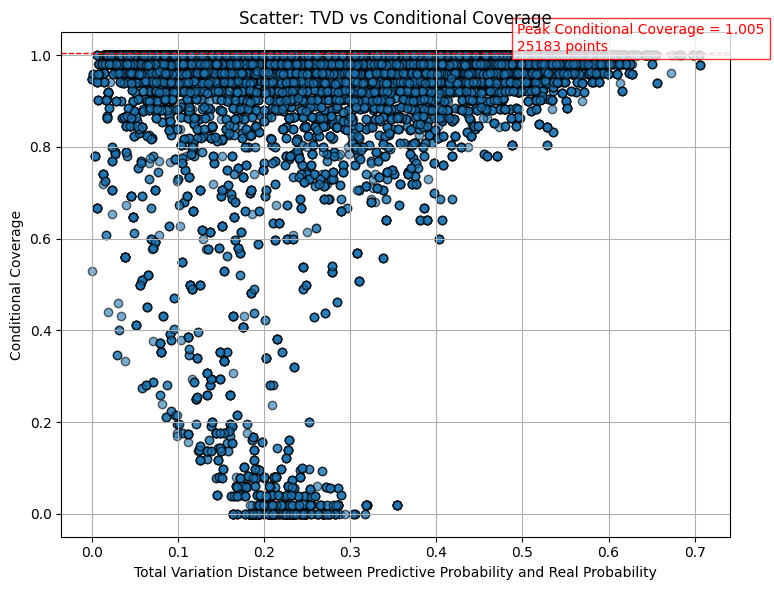

Peak Conditional Coverage = 1.005, with 25183 samples

=== Count Regions Summary ===
38769 (77.5%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
3803 (7.6%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
2008 (4.0%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.79233']
  Real Probability Set      : ['0.98000']
Sample 2:
  Predictive Probability Set: ['0.80122']
  Real Probability Set      : ['0.98077']
Sample 3:
  Predictive Probability Set: ['0.75202']
  Real Probability Set      : ['0.80000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.25993', '0.24001']
  Real Probability Set      : ['0.01923', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.33264', '0.23262']
  Real Probability Set      : ['0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.25707', '0.20932']
  Real Probability Set      : ['

In [3]:
raps_cifar10h_scatter(model,dataset,device, lambda_=0.2, k_reg=2, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9854 ± 0.0365
Final Average Prediction Set Size: 1.46 ± 0.04
Final Average Coverage: 0.9505 ± 0.0032
Final Average Real Probability: 0.9255 ± 0.0035


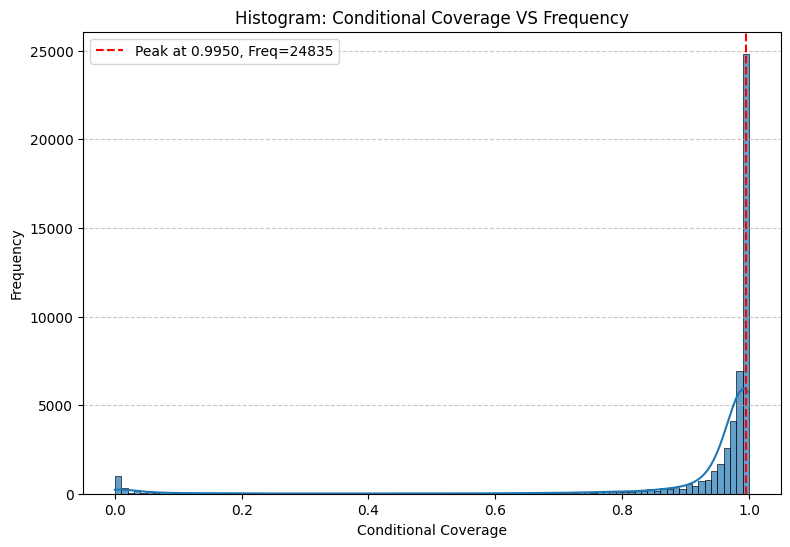

24835 (49.67%) samples reached the peak conditional coverage at 0.9950


In [2]:
saps_cifar10h_hist(model, dataset, device, lambda_=1.0, num_runs=10, alpha=0.05, is_ground_truth=False)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9578 ± 0.0338
Final Average Prediction Set Size: 1.45 ± 0.03
Final Average Coverage: 0.9500 ± 0.0029
Final Average Real Probability: 0.9250 ± 0.0032


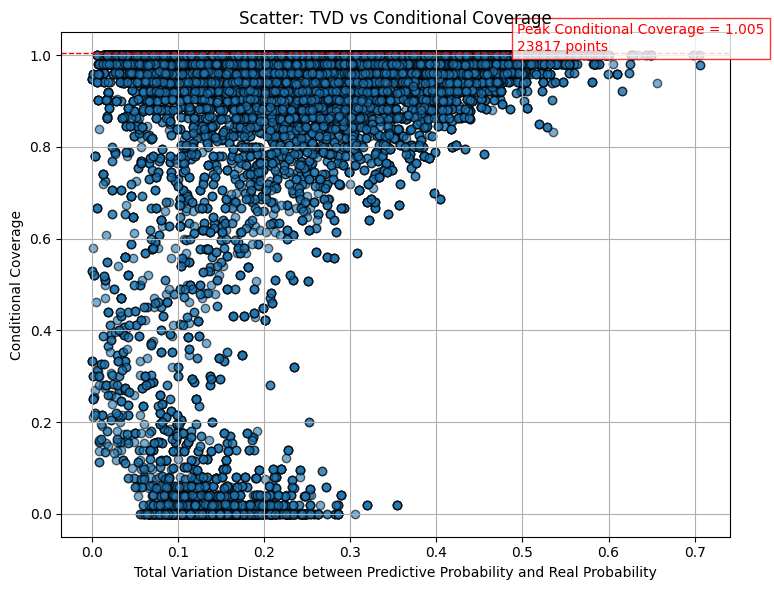

Peak Conditional Coverage = 1.005, with 23817 samples

=== Count Regions Summary ===
43053 (86.1%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
800 (1.6%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
3957 (7.9%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.81485']
  Real Probability Set      : ['1.00000']
Sample 2:
  Predictive Probability Set: ['0.90440']
  Real Probability Set      : ['1.00000']
Sample 3:
  Predictive Probability Set: ['0.78465']
  Real Probability Set      : ['0.98077']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.33047', '0.27268']
  Real Probability Set      : ['0.03922', '0.01961']
Sample 2:
  Predictive Probability Set: ['0.29849', '0.19575']
  Real Probability Set      : ['0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.48818']
  Real Probability Set      : ['0.00000']

-

In [4]:
saps_cifar10h_scatter(model, dataset, device, lambda_=1.0, num_runs=10, alpha=0.05)